Sales Columns: Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')
Churn Columns: Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')

===== BUSINESS METRICS =====
Total Revenue: 12365048
Average Sale: 123650.48


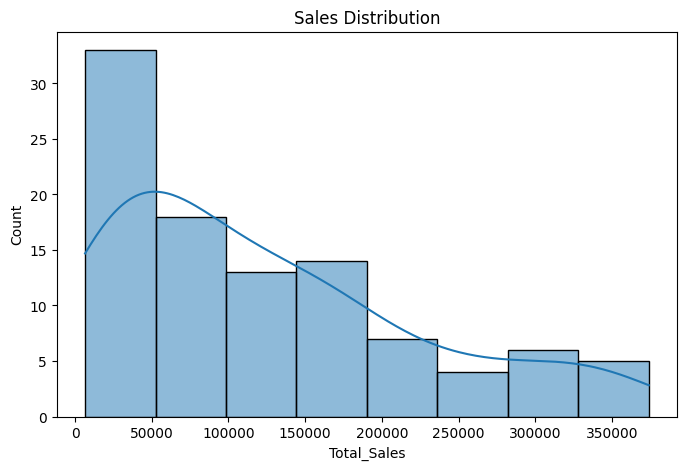

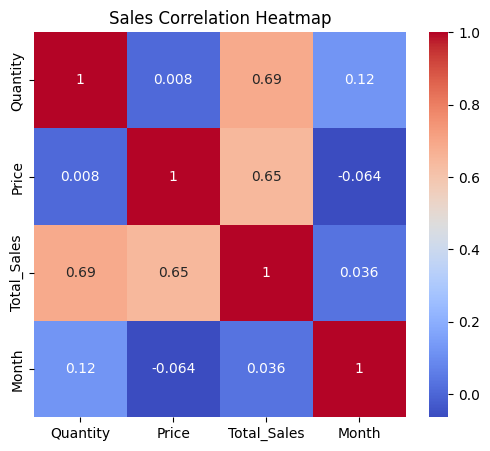

Segment column not found — skipping segment analysis.

===== HYPOTHESIS TEST =====
T-Test p-value: 1.4675017262182455e-27
Result: Statistically Significant Difference
Marketing_Spend column not found — skipping regression.

===== CHURN RATE =====
Churn
0    0.894
1    0.106
Name: proportion, dtype: float64


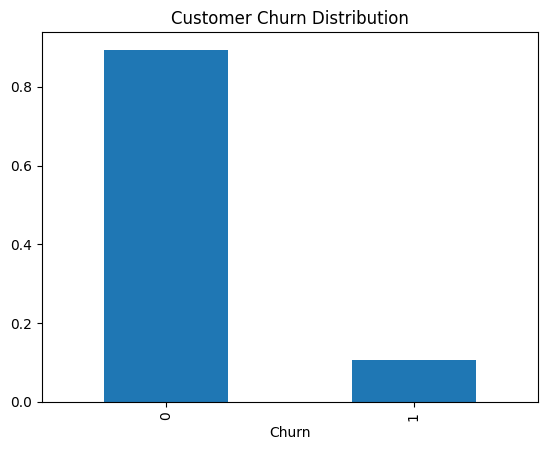


Capstone Analysis Completed Successfully!


In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

sales = pd.read_csv("sales_data.csv")
churn = pd.read_csv("customer_churn.csv")

print("Sales Columns:", sales.columns)
print("Churn Columns:", churn.columns)

sales.dropna(inplace=True)
churn.dropna(inplace=True)

if 'Date' in sales.columns:
    sales['Date'] = pd.to_datetime(sales['Date'])
    sales['Month'] = sales['Date'].dt.month

if 'Total_Sales' in sales.columns:
    sales_column = 'Total_Sales'
elif 'Sales' in sales.columns:
    sales_column = 'Sales'
else:
    raise Exception("No Sales column found!")

print("\n===== BUSINESS METRICS =====")
print("Total Revenue:", sales[sales_column].sum())
print("Average Sale:", sales[sales_column].mean())

plt.figure(figsize=(8,5))
sns.histplot(sales[sales_column], kde=True)
plt.title("Sales Distribution")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(sales.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Sales Correlation Heatmap")
plt.show()

if 'Segment' in sales.columns:
    segment_sales = sales.groupby('Segment')[sales_column].sum()
    segment_sales.plot(kind='bar')
    plt.title("Revenue by Segment")
    plt.show()
else:
    print("Segment column not found — skipping segment analysis.")

high_sales = sales[sales[sales_column] > sales[sales_column].mean()][sales_column]
low_sales = sales[sales[sales_column] <= sales[sales_column].mean()][sales_column]

t_stat, p_value = stats.ttest_ind(high_sales, low_sales)

print("\n===== HYPOTHESIS TEST =====")
print("T-Test p-value:", p_value)

if p_value < 0.05:
    print("Result: Statistically Significant Difference")
else:
    print("Result: Not Statistically Significant")

if 'Marketing_Spend' in sales.columns:
    X = sales[['Marketing_Spend']]
    y = sales[sales_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    print("\n===== REGRESSION ANALYSIS =====")
    print("R-squared:", r2_score(y_test, predictions))

    plt.figure(figsize=(8,5))
    plt.scatter(X_test, y_test)
    plt.plot(X_test, predictions)
    plt.title("Regression: Marketing Spend vs Sales")
    plt.xlabel("Marketing Spend")
    plt.ylabel("Sales")
    plt.show()

else:
    print("Marketing_Spend column not found — skipping regression.")

if 'Churn' in churn.columns:
    churn_rate = churn['Churn'].value_counts(normalize=True)
    print("\n===== CHURN RATE =====")
    print(churn_rate)

    churn_rate.plot(kind='bar')
    plt.title("Customer Churn Distribution")
    plt.show()
else:
    print("Churn column not found.")

print("\nCapstone Analysis Completed Successfully!")
